# K-Nearest Neighbors

In [2]:
!pip install scikit-learn==0.23.1

### Let's load required libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

### Let's download the dataset. Download the data from IBM object storage

In [16]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2021-06-18 20:06:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: 'teleCust1000t.csv'

     0K .......... .......... .......... .....                100% 56.3K=0.6s

2021-06-18 20:06:34 (56.3 KB/s) - 'teleCust1000t.csv' saved [36047/36047]



In [18]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Data Visualization and Analysis

##### Let's see ow many of each class is in our dataset

In [19]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021143F4B088>]],
      dtype=object)

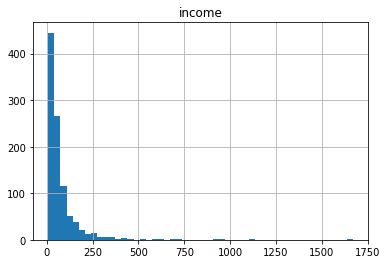

In [20]:
df.hist(column='income', bins=50)

In [21]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

##### To use scikit-learn , we have to convert the pandas data frame to a numpy array

In [24]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside', 'custcat']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

In [25]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data

In [27]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('Trainn set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Trainn set: (800, 12) (800,)
Test set: (200, 12) (200,)


# Classification

### K nearest neighour(KNN)

#### import library

In [31]:
from sklearn.neighbors import KNeighborsClassifier

## Training

###### Let's start the algorithm with k=4 :

In [33]:
k = 4
# Train Model and predict 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

#### We can use the model to make predictions on the test set

In [34]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 1, 2, 4], dtype=int64)

In [35]:
yhat[5:10]

array([3, 3, 1, 3, 4], dtype=int64)

In [36]:
yhat[50:55]

array([2, 3, 2, 3, 4], dtype=int64)

## Accuracy evulation

In [37]:
from sklearn import metrics

In [40]:
print("Train set accuracy: ", metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test,yhat))

Train set accuracy:  0.82875
Test set Accuracy:  0.735


###### Let's start the algorithm with k=6 :

In [42]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [43]:
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test,yhat))

Train set Accuracy:  0.8125
Test set Accuracy:  0.735


### We can calculate the accuracy of KNN for different values of K .

In [45]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test,yhat)
    
    std_acc[n-1] = np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])

### Plot the model accuracy for a different number of neighbors

<function matplotlib.pyplot.show(*args, **kw)>

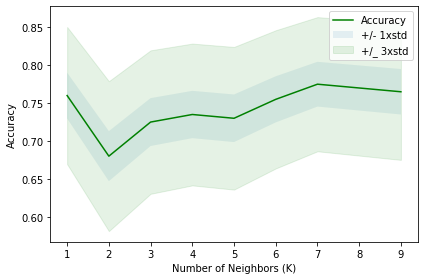

In [47]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1*std_acc , mean_acc + 1*std_acc, alpha = 0.10)
plt.fill_between(range(1,Ks),mean_acc - 3*std_acc , mean_acc + 3*std_acc, alpha = 0.10 , color = 'green')
plt.legend(('Accuracy', '+/- 1xstd','+/_ 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show

In [50]:
print("The bets accuracy was with", mean_acc.max(), "with K = ", mean_acc.argmax()+1)

The bets accuracy was with 0.775 with K =  7
